## SVC Classification, Iteration 1

First, we will import necessary packages and load in our data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

raw_data = pd.read_csv('rodpump_noImputed.csv')

Next, define a function that will transform categorical column values into numerical representations for use within the SVC classifier.

In [2]:
from sklearn.preprocessing import LabelEncoder

def encode(df, columns):
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    return df

We also created a list of these columns so we could quickly encode all of the categorical columns in our dataset.

In [3]:
categorical_columns = ['bha_configuration',
                      'wellbore_category',
                       'packer_vs_tac',
                       'rod_sinker_type',
                       'manual_scale',
                       'rod_make',
                       'rod_apigrade',
                       'DESANDDEGAS_TYP',
                       'rod_has_guides',
                       'FAILURETYPE'
                      ]

Let's iterate over those values!

In [4]:
for column in raw_data:
    if (column in categorical_columns):
        encode(raw_data, column)

Import packes necessary for model training and scoring.

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix

Remove procedural identifiers from the dataset and prepare X and y arrays.

In [6]:
#remove pump identifiers
features = list(raw_data)
features.remove('FAILURETYPE')
features.remove('roduid')
features.remove('UWI')
features.remove('lifetime_end')
features.remove('pump_bore')

#define x and y dataset (train/ test data)
X = np.array(raw_data[features])
y = np.array(raw_data['FAILURETYPE'])

Separate data into training and test data using an 80/20 split.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

Train the model and create a confusion matrix to show model performance.

<AxesSubplot:>

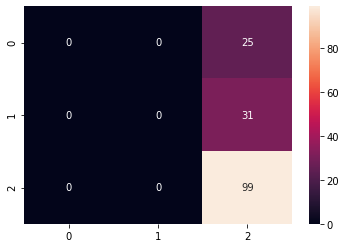

In [8]:
reg_svc = SVC(gamma='auto')
reg_svc.fit(X_train, y_train)
y_pred = reg_svc.predict(X_test)

conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True)

Also, print accuracy score for comparison with other models.

In [9]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.6387096774193548

#### Summary
Although the accuracy score from the SVM classifier looks okay, we can tell that our model is classifying all input points as 'tubing' failures by looking at the confusion matrix.  Since our dataset has significantly more tubing failures than other failures, it is still able to acheive a reasonable accuracy score by offering 'predictions' using this method.  

Going forward, this code creates a framework from which we can improve our input data and modeling methods to hopefully increase our accuracy score and help our model differentiate between various failure types.